Dans cet notebook, nous abordons les statistiques descriptives sur les incidents de sécurité sur le réseau de la SCNF

In [33]:
####################### Paramétrage du notebook ##################################
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [143]:
############ Importation des modules nécessaires et du jeu de données ##############
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime  #pour la gestion des dates
import requests
url_api="https://ressources.data.sncf.com/api/v2/catalog/datasets/incidents-securite/exports/json?limit=-1&offset=0&lang=fr&timezone=Europe%2FParis"
incident= requests.get(url_api).json()
incident=pd.json_normalize(incident)
#incident.head()


## En moyenne, sur la période de 2015 à 2022, quelles sont les régions dans lesquelles les incidents sont plus graves? 💡

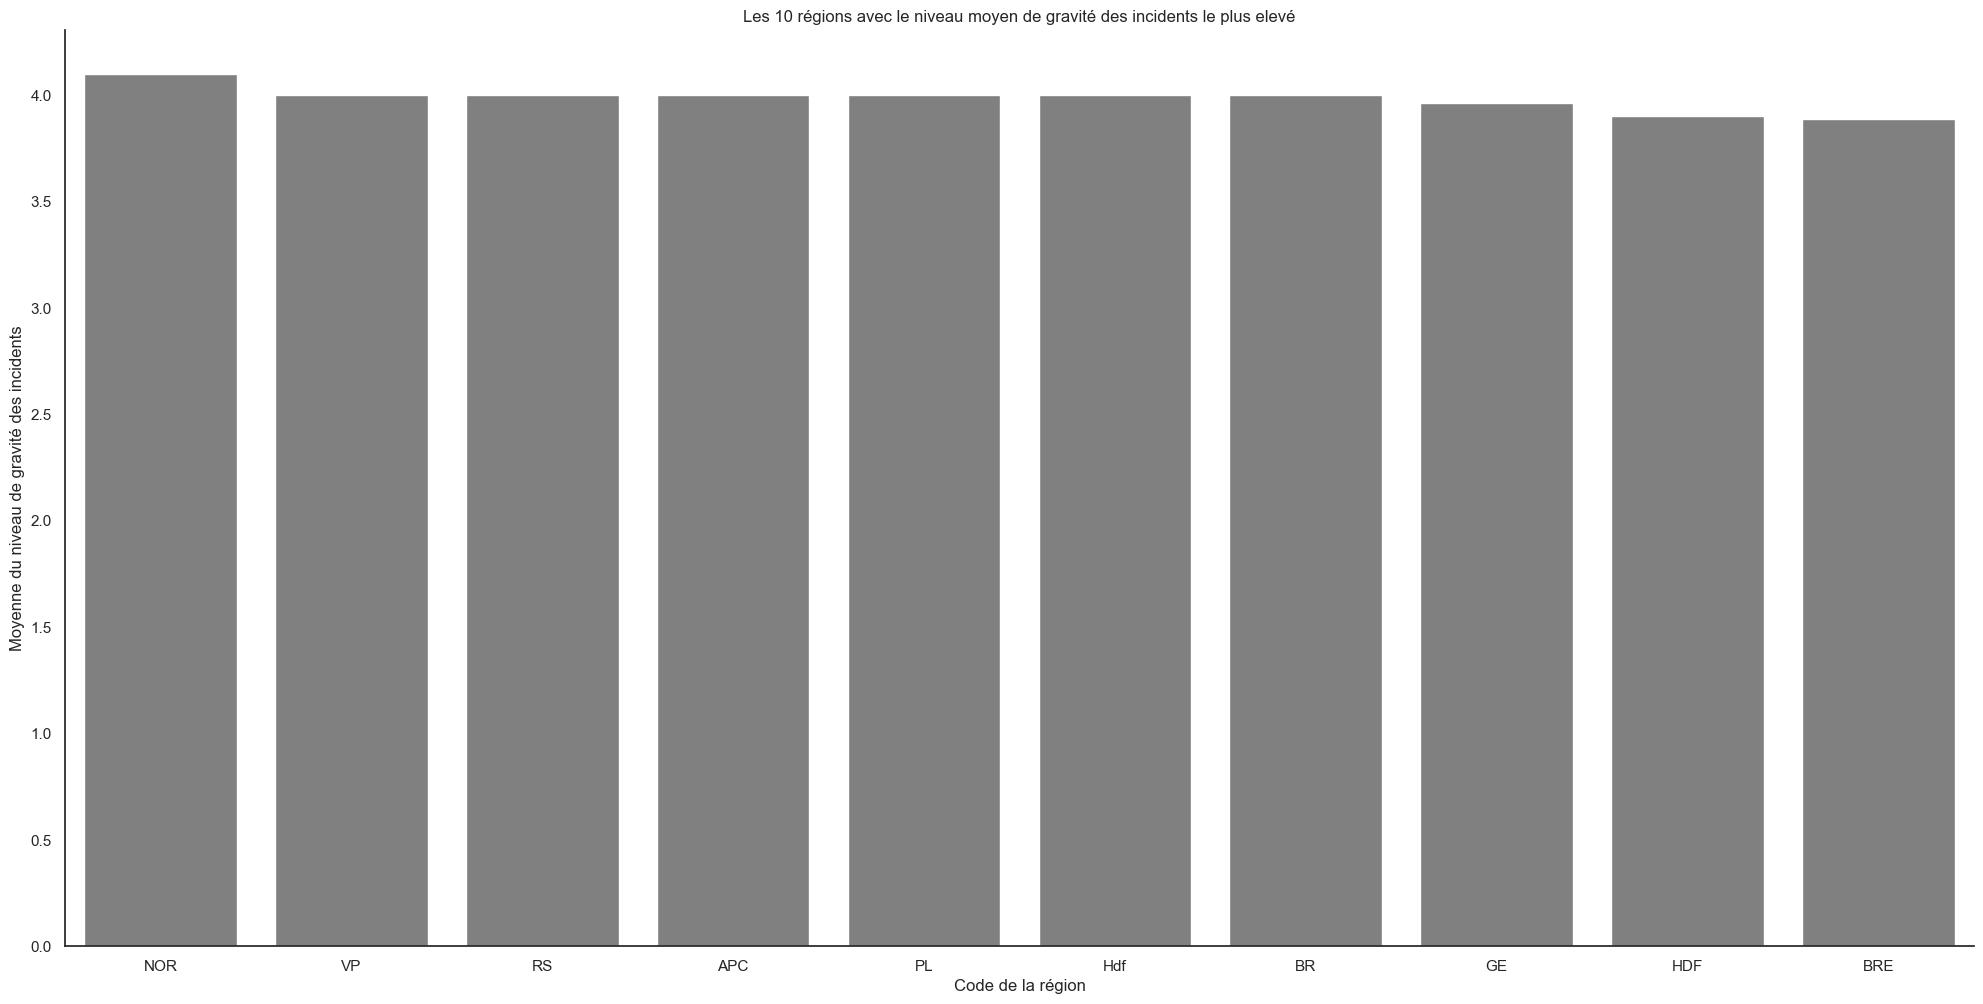

In [109]:
df1=incident.groupby('region').agg({'niveau_gravite': "mean"}).sort_values('niveau_gravite', ascending = False).head(10)
df1=df1.reset_index()
#sns.set(style="darkgrid")
g = sns.catplot(x='region', y='niveau_gravite', data=df1, kind = "bar", height = 10, aspect = 2, color='gray')
g.set_axis_labels('Code de la région', 'Moyenne du niveau de gravité des incidents')
plt.title('Les 10 régions avec le niveau moyen de gravité des incidents le plus elevé')
plt.show()

## En moyenne, sur la période de 2015 à 2022, quelles sont les régions dans lesquelles les incidents sont moins graves? 💡

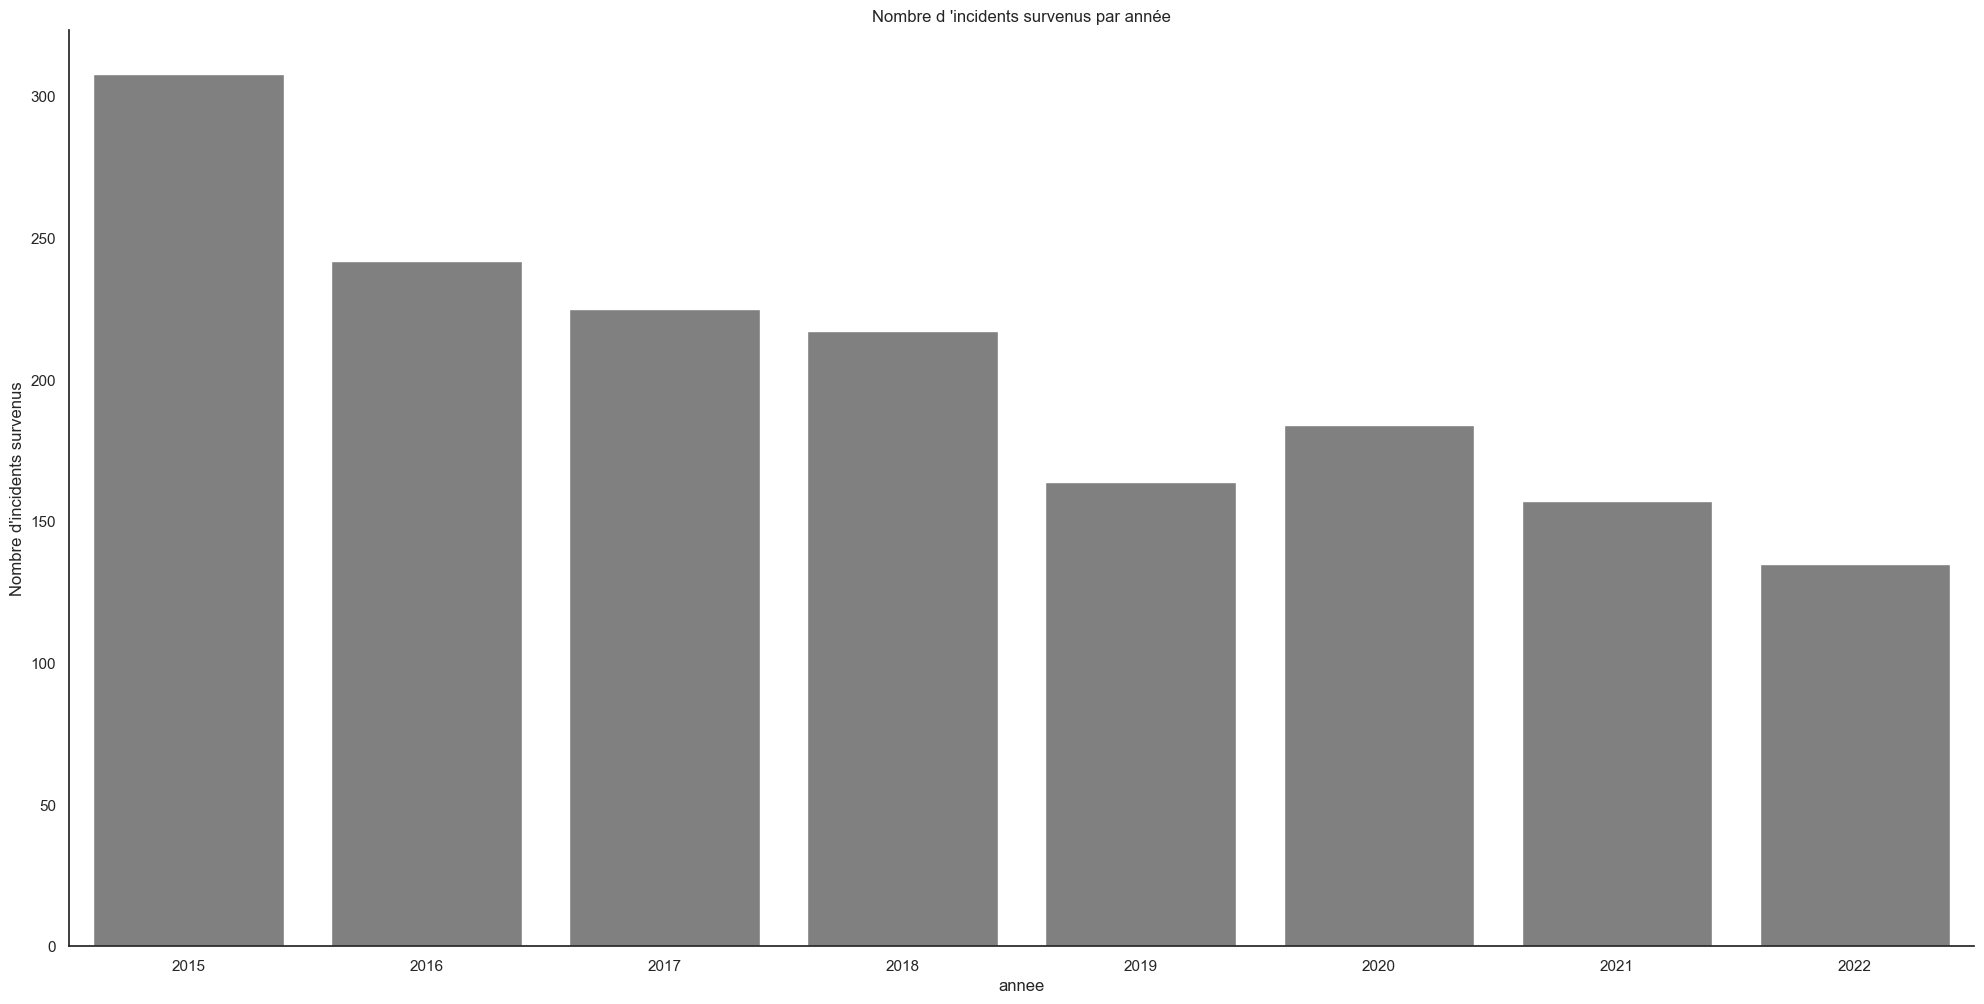

In [170]:
incident['date']=pd.to_datetime(incident['date'])
df2=incident
df2['annee']=incident['date'].dt.strftime('%Y')
df2=df2.groupby('annee')["annee"].count()
df2=pd.DataFrame(df2)
df2.rename(columns = {'annee':'occurence'}, inplace = True)
df2=df2.reset_index()
g1 = sns.catplot(x='annee', y='occurence', data=df2, kind = "bar", height = 10, aspect = 2, color='gray')
g1.set_axis_labels('annee', 'Nombre d\'incidents survenus')
plt.title('Nombre d \'incidents survenus par année')
plt.show()